Acquisition and Analysis of Neural Data 

Exercise 05

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(style="darkgrid", context="talk", palette="pastel")
plt.style.use('seaborn')

(a)

In [2]:
T = 500
var = 2
del_t = 5e-3 

t = np.arange(0, T, del_t)
n_samples = int(T / del_t)

In [3]:
white_stim = np.random.normal(0, var/del_t, n_samples)

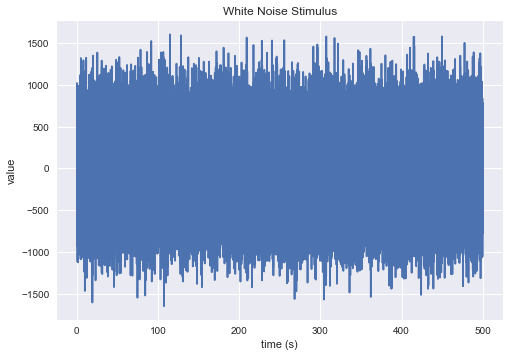

In [4]:
plt.plot(t, white_stim)
plt.title('White Noise Stimulus')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.show()

(b)

In [5]:
def get_r_est(r0, kernel, stimulus, del_t):
    return r0 + np.convolve(stimulus, kernel) * del_t

In [6]:
def d_kernel(time_points, A = 200, tau_cos = 20e-3, sigma_cos = 140e-3, sigma_exp = 60e-3):
    return A*np.cos(2*np.pi*(time_points - tau_cos)/sigma_cos)*np.exp(-time_points/sigma_exp)

In [7]:
r0 = 150
kernel = d_kernel(t)

In [8]:
r_est = get_r_est(r0, kernel, white_stim, del_t)[:n_samples]

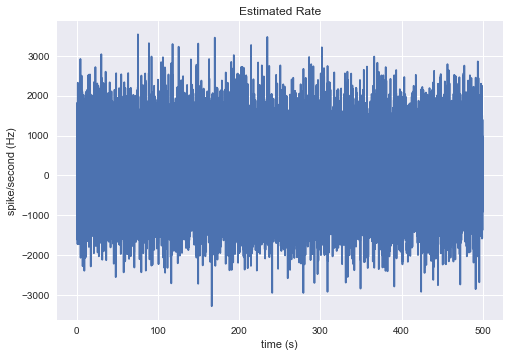

In [9]:
plt.plot(t, r_est)
plt.title('Estimated Rate')
plt.xlabel('time (s)')
plt.ylabel('spike/second (Hz)')
plt.show()

(c)

In [40]:
def plot_autocorrelation(series, max_t, norm_val = 1, xlim2=2, ylim2=2, title = 'Autocorrelation'):
    corr = np.correlate(series.ravel(), series.ravel(), 'full') * norm_val
    t = np.linspace(-max_t, max_t, corr.shape[0])

    fig, ax = plt.subplots(2,1, figsize=(12,8))
    fig.suptitle(title)
    ax[0].plot(t, corr)
    ax[0].set_xlabel('τ (s)')
    ax[0].set_title('Full Plot')

    ax[1].plot(t, corr)
    ax[1].set_xlabel('τ (s)')
    ax[1].set_ylim(-ylim2,ylim2)
    ax[1].set_xlim(-xlim2,xlim2)
    ax[1].set_title('Zoomed Plot')

    fig.tight_layout()
    plt.show()

In [41]:
a_corr = r_est - r0
a_corr = np.correlate(a_corr, a_corr, 'full') * del_t / T

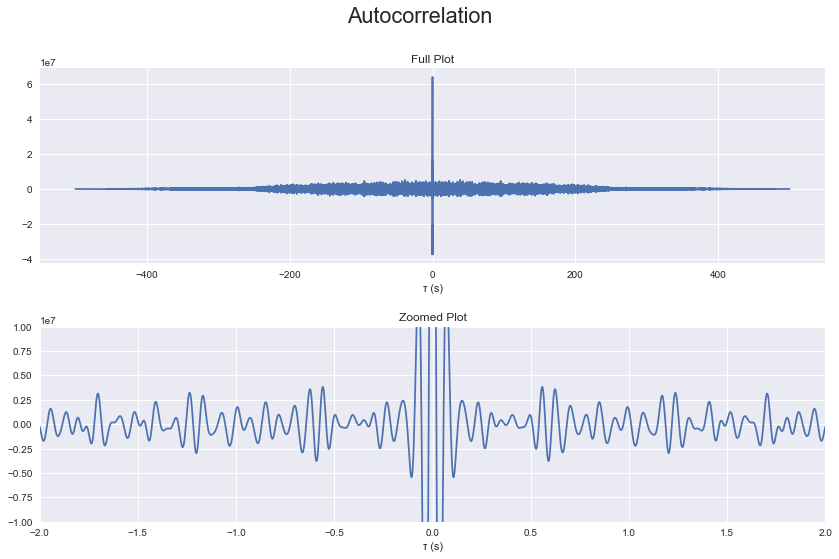

In [46]:
plot_autocorrelation(a_corr, T, norm_val=del_t/T, ylim2=1e7)

(d)

In [47]:
def generate_inhomogeneous_poisson(rates, del_t):
    spikes = np.random.rand(rates.shape[0])

    max_rate = np.max(rates)
    prob = rates * del_t 

    return (spikes < prob).astype(int)    

In [48]:
poisson = generate_inhomogeneous_poisson(r_est, del_t)
print('firing rates of poisson spike train: {}'.format(np.sum(poisson)/T))

firing rates of poisson spike train: 104.482


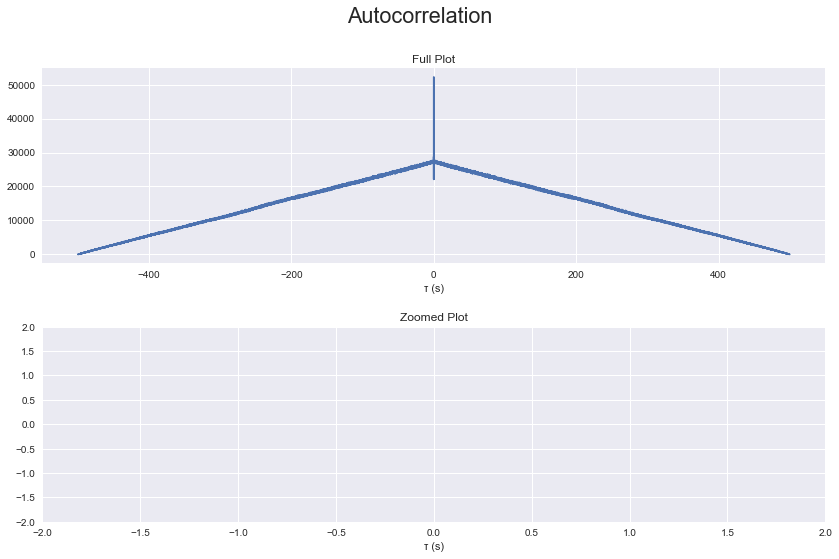

In [50]:
plot_autocorrelation(poisson, T)

(e)

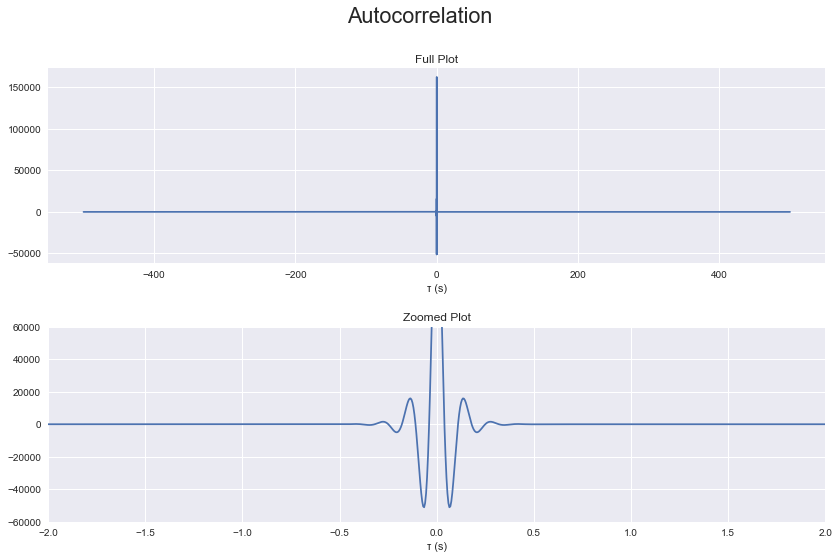

In [54]:
plot_autocorrelation(kernel, T, ylim2 = 60000)